# Part 3: Classify all documents into 20 groups using K-means clustering

In this part of the project, we examine how purely we can retrieve all 20 original sub-class labels
with clustering. Therefore, instead of clustering the documents into 2 classes, we try to cluster all
the documents from the 20 topics, and cluster them into the 20 classes as the ground-truth topics.
To do so, we need to include all the documents and the corresponding terms in the data matrix,
and find proper representation through dimensionality reduction of the TF-IDF matrix.

In [1]:
from sklearn.datasets import fetch_20newsgroups
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
from math import log
import matplotlib.pyplot as plt
import re

## Loading data

In [2]:
#Loading data
comp_tech_subclasses=['comp.graphics','comp.os.ms-windows.misc','comp.sys.ibm.pc.hardware','comp.sys.mac.hardware','comp.windows.x']
rec_act_subclasses=['rec.autos','rec.motorcycles','rec.sport.baseball','rec.sport.hockey']
science_subclass=['sci.crypt','sci.electronics','sci.med','sci.space']
miscellaneous_subclass=['misc.forsale']
politics_subclass=['talk.politics.misc','talk.politics.guns','talk.politics.mideast']
religion_subclass=['talk.religion.misc','alt.atheism','soc.religion.christian']
dataset=fetch_20newsgroups(subset='all',categories=comp_tech_subclasses+rec_act_subclasses+science_subclass+miscellaneous_subclass
                           +politics_subclass+religion_subclass,shuffle=True,random_state=42,remove=('headers','footers','quotes'))
labels=dataset.target

## Preprocessing data

In [3]:
#Data preprocessing
punctuations='[! \" # $ % \& \' \( \) \* + , \- \. \/ : ; <=> ? @ \[ \\ \] ^ _ ` { \| } ~]'
stemmer=SnowballStemmer("english")
def remove_punctuation_and_stem(data_list):
    for i in range(len(data_list)):
        data_list[i]=" ".join([stemmer.stem(data) for data in re.split(punctuations,data_list[i])])
        data_list[i]=data_list[i].replace('\n','').replace('\t','').replace('\r','')

remove_punctuation_and_stem(dataset.data)

## Feature extraction using TF-IDF matrix

In [4]:
#Feature extraction using TFxIDF
vectorizer=TfidfVectorizer(max_features=10000,min_df=3,stop_words='english',use_idf=True)
X=vectorizer.fit_transform(dataset.data)


## K-means algorithm

In [5]:
def k_means(X_reduced,labels,dim_reduce):
    km=KMeans(n_clusters=20,init='k-means++',max_iter=100,n_init=1)
    km.fit(X_reduced)
    homo=metrics.homogeneity_score(labels,km.labels_)
    vmeasure=metrics.v_measure_score(labels,km.labels_)
    complete=metrics.completeness_score(labels,km.labels_)
    rand=metrics.adjusted_rand_score(labels,km.labels_)
    mutual=metrics.adjusted_mutual_info_score(labels,km.labels_)
    print('Dimension reduction method:',dim_reduce)
    return homo,complete,vmeasure,rand,mutual


**To simplify the process of optimization, we plotted all the five performance score versus the
reduced number of dimensions. Due to the high volume of the confusion matrices in this case,
we simply optimize our dimension-reduction based on the performance scores.**

## Reducing dimensionality using SVD

In [6]:
#Reducing dimensionality using SVD
dimension_array=[1,2,3,5,10,20,50,100,200,300]
homos_SVD=[]
cmplts_SVD=[]
vmeasures_SVD=[]
rands_SVD=[]
mutuals_SVD=[]


In [7]:
for d in dimension_array:
    print('Performing truncatedSVD to reduce dimension to '+str(d))
    svd=TruncatedSVD(n_components=d,n_iter=13,random_state=42)
    normalizer=Normalizer(copy=False)
    lsa=make_pipeline(svd,normalizer)
    X_reduced=lsa.fit_transform(X)

    homo,cmplt,vmeasure,rand,mutual=k_means(X_reduced,labels,'truncatedSVD')
    homos_SVD.append(homo)
    cmplts_SVD.append(cmplt)
    vmeasures_SVD.append(vmeasure)
    rands_SVD.append(rand)
    mutuals_SVD.append(mutual)

Performing truncatedSVD to reduce dimension to 1


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (20). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Dimension reduction method: truncatedSVD
Performing truncatedSVD to reduce dimension to 2


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Dimension reduction method: truncatedSVD
Performing truncatedSVD to reduce dimension to 3


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Dimension reduction method: truncatedSVD
Performing truncatedSVD to reduce dimension to 5


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Dimension reduction method: truncatedSVD
Performing truncatedSVD to reduce dimension to 10


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Dimension reduction method: truncatedSVD
Performing truncatedSVD to reduce dimension to 20


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Dimension reduction method: truncatedSVD
Performing truncatedSVD to reduce dimension to 50


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Dimension reduction method: truncatedSVD
Performing truncatedSVD to reduce dimension to 100


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Dimension reduction method: truncatedSVD
Performing truncatedSVD to reduce dimension to 200


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Dimension reduction method: truncatedSVD
Performing truncatedSVD to reduce dimension to 300
Dimension reduction method: truncatedSVD


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


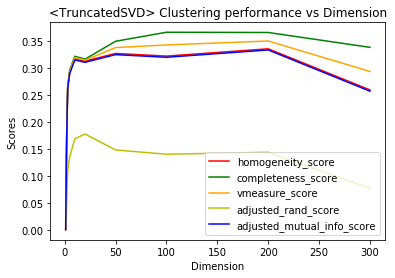

In [8]:
plt.plot(dimension_array,homos_SVD,color='r',label='homogeneity_score')
plt.plot(dimension_array,cmplts_SVD,color='g',label='completeness_score')
plt.plot(dimension_array,vmeasures_SVD,color='orange',label='vmeasure_score')
plt.plot(dimension_array,rands_SVD,color='y',label='adjusted_rand_score')
plt.plot(dimension_array,mutuals_SVD,color='b',label='adjusted_mutual_info_score')
plt.legend()
plt.xlabel('Dimension')
plt.ylabel('Scores')
plt.title('<TruncatedSVD> Clustering performance vs Dimension')
plt.show()

## Reducing dimensionality using PCA

In [9]:
#Reducing dimensionality using PCA
homos_PCA=[]
cmplts_PCA=[]
vmeasures_PCA=[]
rands_PCA=[]
mutuals_PCA=[]

for d in dimension_array:
    print('Performing PCA to reduce dimension to '+str(d))

    pca=PCA(n_components=d,random_state=42)
    normalizer=Normalizer(copy=False)
    lsa=make_pipeline(pca,normalizer)
    X_reduced=lsa.fit_transform(X.toarray())

    homo,cmplt,vmeasure,rand,mutual=k_means(X_reduced,labels,'PCA')
    homos_PCA.append(homo)
    cmplts_PCA.append(cmplt)
    rands_PCA.append(rand)
    vmeasures_PCA.append(vmeasure)
    mutuals_PCA.append(mutual)

Performing PCA to reduce dimension to 1


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (20). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Dimension reduction method: PCA
Performing PCA to reduce dimension to 2


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Dimension reduction method: PCA
Performing PCA to reduce dimension to 3


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Dimension reduction method: PCA
Performing PCA to reduce dimension to 5


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Dimension reduction method: PCA
Performing PCA to reduce dimension to 10


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Dimension reduction method: PCA
Performing PCA to reduce dimension to 20


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Dimension reduction method: PCA
Performing PCA to reduce dimension to 50


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Dimension reduction method: PCA
Performing PCA to reduce dimension to 100


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Dimension reduction method: PCA
Performing PCA to reduce dimension to 200


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Dimension reduction method: PCA
Performing PCA to reduce dimension to 300


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Dimension reduction method: PCA


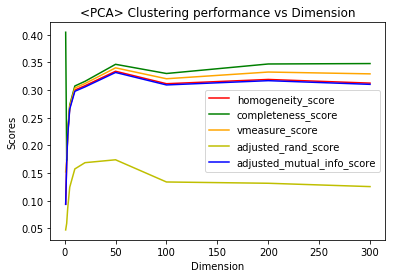

In [10]:
plt.plot(dimension_array,homos_PCA,color='r',label='homogeneity_score')
plt.plot(dimension_array,cmplts_PCA,color='g',label='completeness_score')
plt.plot(dimension_array,vmeasures_PCA,color='orange',label='vmeasure_score')
plt.plot(dimension_array,rands_PCA,color='y',label='adjusted_rand_score')
plt.plot(dimension_array,mutuals_PCA,color='b',label='adjusted_mutual_info_score')
plt.legend()
plt.xlabel('Dimension')
plt.ylabel('Scores')
plt.title('<PCA> Clustering performance vs Dimension')
plt.show()

## Reducing Dimensionality using NMF with and without logarithmic transformation

In [26]:
#Reducing dimensionality using NMF
homos_NMF=[]
cmplts_NMF=[]
vmeasures_NMF=[]
rands_NMF=[]
mutuals_NMF=[]

#Reducing dimensionality using NMF with a non-linear logarithmic transformation
homosLog_NMF=[]
cmpltsLog_NMF=[]
vmeasuresLog_NMF=[]
randsLog_NMF=[]
mutualsLog_NMF=[]

In [27]:
for d in dimension_array:
    print('Performing NMF with/without logarithm transformation to reduce dimension to '+str(d))
    nmf=NMF(n_components=d,random_state=42)
    lsa=make_pipeline(nmf)
    X_reduced=lsa.fit_transform(X)

    homo,cmplt,vmeasure,rand,mutual=k_means(X_reduced,labels,'NMF')
    homos_NMF.append(homo)
    cmplts_NMF.append(cmplt)
    vmeasures_NMF.append(vmeasure)
    rands_NMF.append(rand)
    mutuals_NMF.append(mutual)

    # ----------------------------Non-linear Transformation-------------------------
    for j in range(X_reduced.shape[0]):
        for k in range(X_reduced.shape[1]):
            if X_reduced[j][k] == 0:
                X_reduced[j][k]=-3.08
            else:
                X_reduced[j][k]=log(X_reduced[j][k],10)
    # ------------------------------------------------------------------------------

    homo,cmplt,vmeasure,rand,mutual=k_means(X_reduced,labels,'NMF_LOG')

    homosLog_NMF.append(homo)
    cmpltsLog_NMF.append(cmplt)
    vmeasuresLog_NMF.append(vmeasure)
    randsLog_NMF.append(rand)
    mutualsLog_NMF.append(mutual)

Performing NMF with/without logarithm transformation to reduce dimension to 1


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Dimension reduction method: NMF


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Dimension reduction method: NMF_LOG
Performing NMF with/without logarithm transformation to reduce dimension to 2


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Dimension reduction method: NMF


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Dimension reduction method: NMF_LOG
Performing NMF with/without logarithm transformation to reduce dimension to 3


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Dimension reduction method: NMF


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Dimension reduction method: NMF_LOG
Performing NMF with/without logarithm transformation to reduce dimension to 5


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Dimension reduction method: NMF


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Dimension reduction method: NMF_LOG
Performing NMF with/without logarithm transformation to reduce dimension to 10


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Dimension reduction method: NMF


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Dimension reduction method: NMF_LOG
Performing NMF with/without logarithm transformation to reduce dimension to 20


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Dimension reduction method: NMF


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Dimension reduction method: NMF_LOG
Performing NMF with/without logarithm transformation to reduce dimension to 50


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Dimension reduction method: NMF


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Dimension reduction method: NMF_LOG
Performing NMF with/without logarithm transformation to reduce dimension to 100


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Dimension reduction method: NMF


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Dimension reduction method: NMF_LOG
Performing NMF with/without logarithm transformation to reduce dimension to 200


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Dimension reduction method: NMF


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Dimension reduction method: NMF_LOG
Performing NMF with/without logarithm transformation to reduce dimension to 300


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Dimension reduction method: NMF
Dimension reduction method: NMF_LOG


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


In [28]:
len(homos_NMF)

10

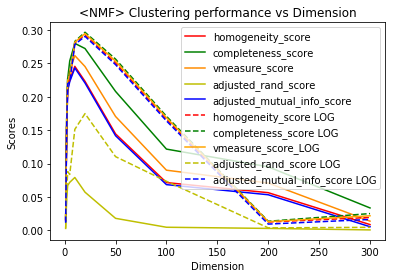

In [29]:
plt.plot(dimension_array,homos_NMF,color='r',label='homogeneity_score')
plt.plot(dimension_array,cmplts_NMF,color='g',label='completeness_score')
plt.plot(dimension_array,vmeasures_NMF,color='darkorange',label='vmeasure_score')
plt.plot(dimension_array,rands_NMF,color='y',label='adjusted_rand_score')
plt.plot(dimension_array,mutuals_NMF,color='b',label='adjusted_mutual_info_score')
plt.plot(dimension_array,homosLog_NMF,'r--',label='homogeneity_score LOG')
plt.plot(dimension_array,cmpltsLog_NMF,'g--',label='completeness_score LOG')
plt.plot(dimension_array,vmeasuresLog_NMF,color='orange',label='vmeasure_score_LOG')
plt.plot(dimension_array,randsLog_NMF,'y--',label='adjusted_rand_score LOG')
plt.plot(dimension_array,mutualsLog_NMF,'b--',label='adjusted_mutual_info_score LOG')
plt.legend()
plt.xlabel('Dimension')
plt.ylabel('Scores')
plt.title('<NMF> Clustering performance vs Dimension')
plt.show()

**As we can see from the results above, the optimal dimension for different reduction methods fall
in different regions. For truncated SVD, the optimized reduced dimension is in the range of
175-225, while for PCA, in the range of 0-15, and in the range of 0-5 for NMF without the log
transformation, and 5-15 for NMF with the non-linear log transformation.**

# Visualizing all 20 clusters

Although the
visualized clusters from SVD are vague due to the large amount of clusters, we can still figure
out something from the clustering patterns with the NMF reductions (with and without the
logarithm transformation)

## Creating function to plot clusters

In [17]:
#Plotting clusters
def plot_clusters(actual_labels,clustered_labels,X_2d,centers,reducer):
    color=["grey","lightcoral","maroon","mistyrose","coral","peachpuff","darkorange","orange","darkgoldenrod",
             "olive","yellowgreen","lawngreen","lightgreen","g","mediumseagreen","mediumturquoise","c","cadetblue",
             "skyblue","dodgerblue"]
    mark=["o","+","v","^","s","p","*","D","x","d"]
    for i in range(len(labels)):
        plt.scatter(X_2d[i,0],X_2d[i,1],s=12,marker=mark[(actual_labels[i] % 10)],color=color[clustered_labels[i]],alpha=0.5)
    for i in range(20):
        plt.scatter(centers[i,0],centers[i,1],marker='^',s=100,color='k',alpha=0.6)
    plt.title('Clustering results with ' + reducer)
    plt.show()

## Using K-means algorithm

In [18]:
#Clustering into all 20 subclasses
km=KMeans(n_clusters=20,init='k-means++',max_iter=100,n_init=1)

## Reducing Dimensionality using SVD

In [19]:
#Reduce dimensionality using SVD: best r value comes out to be 200, with n_iter=13
print('Performing truncatedSVD')
svd=TruncatedSVD(n_components=200,n_iter=13,random_state=42)
normalizer=Normalizer(copy=False)
lsa=make_pipeline(svd,normalizer)
X_reduced=lsa.fit_transform(X)

km.fit(X_reduced)
clustered_labels=km.labels_

svd=TruncatedSVD(n_components=2,n_iter=13,random_state=42)
X_2d=svd.fit_transform(X)
km.fit(X_2d)
centers=km.cluster_centers_



Performing truncatedSVD


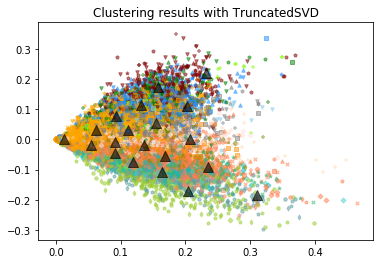

In [20]:
plot_clusters(labels,clustered_labels,X_2d,centers,'TruncatedSVD')

## Reducing Dimensionality using NMF without transformation

In [22]:
#Reduce dimensionality using NMF: best r value comes out to be 2
print('Performing NMF without any non-linear transformation')
nmf=NMF(n_components=2,random_state=42)
lsa=make_pipeline(nmf)
X_reduced=lsa.fit_transform(X)

km.fit(X_reduced)
clustered_labels=km.labels_
centers=km.cluster_centers_



Performing NMF without any non-linear transformation


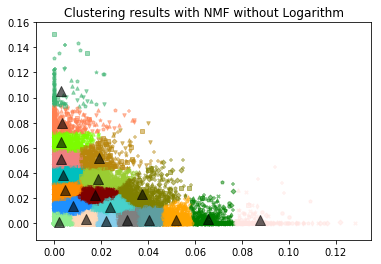

In [23]:
plot_clusters(labels,clustered_labels,X_reduced,centers,'NMF without Logarithm')

## Reducing Dimensionality using NMF with transformation

In [24]:
#Reduce dimensionality using NMF with the logarithmic non-linear transformation: best r value comes out to be 10
print('Performing NMF with the logarithmic non-linear transformation')
nmf=NMF(n_components=10,random_state=42)
lsa=make_pipeline(nmf)
X_reduced=lsa.fit_transform(X)

# ----------------------------Non-linear Transformation-------------------------
for j in range(X_reduced.shape[0]):
    for k in range(X_reduced.shape[1]):
        if X_reduced[j][k] == 0:
            X_reduced[j][k]=-3.08
        else:
            X_reduced[j][k]=log(X_reduced[j][k],10)
# ------------------------------------------------------------------------------

km.fit(X_reduced)
clustered_labels=km.labels_

nmf=NMF(n_components=2,random_state=42)
X_2d=nmf.fit_transform(X)
km.fit(X_2d)
centers=km.cluster_centers_



Performing NMF with the logarithmic non-linear transformation


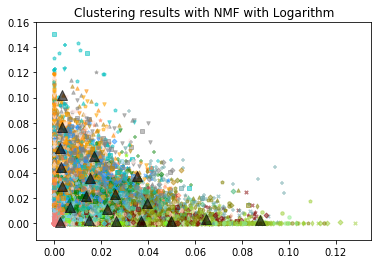

In [25]:
plot_clusters(labels,clustered_labels,X_2d,centers,'NMF with Logarithm')

**In case of NMF (without the logarithmic
transformation), the partitions between different clusters are almost linear, while for NMF-Log,
the partitions are not linear anymore and the results are more accurate.**